<a href="https://colab.research.google.com/github/MinhThuan1608/ML_2023/blob/main/Lab_4_20130426_NguyenMinhThuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [12]:
# code
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




y_pred:  [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
cm: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy :  0.9777777777777777


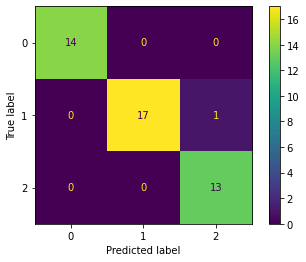

In [3]:
from sklearn import metrics
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
# code

data = datasets.load_iris()
X = data.data
Y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("y_pred: ", y_pred)


cm = confusion_matrix(y_test, y_pred)
print("cm: \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 


#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


y_pred:  [4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 9 6 2 7]
cm: 
 [[1 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 1]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]]
Accuracy :  0.9


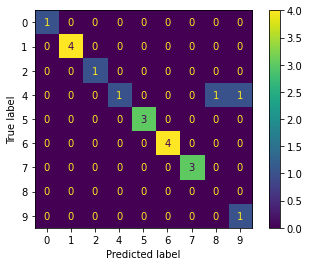

In [4]:
# code

mnist = datasets.load_digits()

X = mnist.data
Y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 20, random_state = 2)

classifier = LogisticRegression(random_state = 1) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("y_pred: ", y_pred)
 
cm = confusion_matrix(y_test, y_pred)
print("cm: \n", cm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


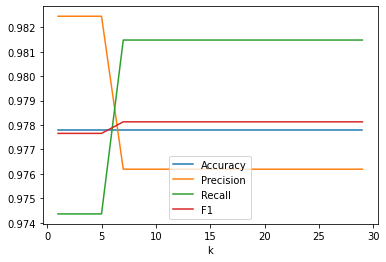

In [13]:
from pandas.compat import numpy
# code

data = datasets.load_iris()
X = data.data
Y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,30,2)

acc = []
prec = []
recall = []
f1 = []

for k in k_range:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  prec.append(metrics.precision_score(y_test, y_pred, average='macro'))
  recall.append(metrics.recall_score(y_test, y_pred, average='macro'))
  f1.append(metrics.f1_score(y_test, y_pred, average='macro'))

plt.plot(k_range, acc, label="Accuracy")
plt.plot(k_range, prec, label="Precision")
plt.plot(k_range, recall, label="Recall")
plt.plot(k_range, f1, label="F1")
plt.xlabel("k")
plt.legend()




#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


[1.0, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


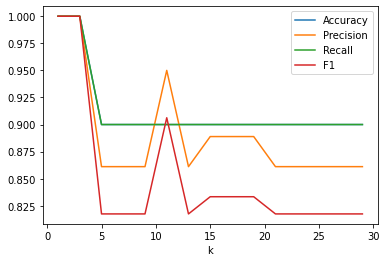

In [22]:
# code
mnist = datasets.load_digits()

X = mnist.data
Y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 20, random_state = 2)

from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,30,2)

acc = []
prec = []
recall = []
f1 = []

for k in k_range:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  prec.append(metrics.precision_score(y_test, y_pred, average='macro'))
  recall.append(metrics.recall_score(y_test, y_pred, average='micro'))
  f1.append(metrics.f1_score(y_test, y_pred, average='macro'))

print(acc)
plt.plot(k_range, acc, label="Accuracy")
plt.plot(k_range, prec, label="Precision")
plt.plot(k_range, recall, label="Recall")
plt.plot(k_range, f1, label="F1")
plt.xlabel("k")
plt.legend()

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
# code

#Finally,
Save a copy in your Github. Remember renaming the notebook.